# Plot Population Densities of the Counties and the Districts
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Prepare Modules and Data

In [1]:
# Used to cast the polygons into np.arrays to transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
pop_densities_directory = os.getcwd()

Data from old API-pull is ready to go!


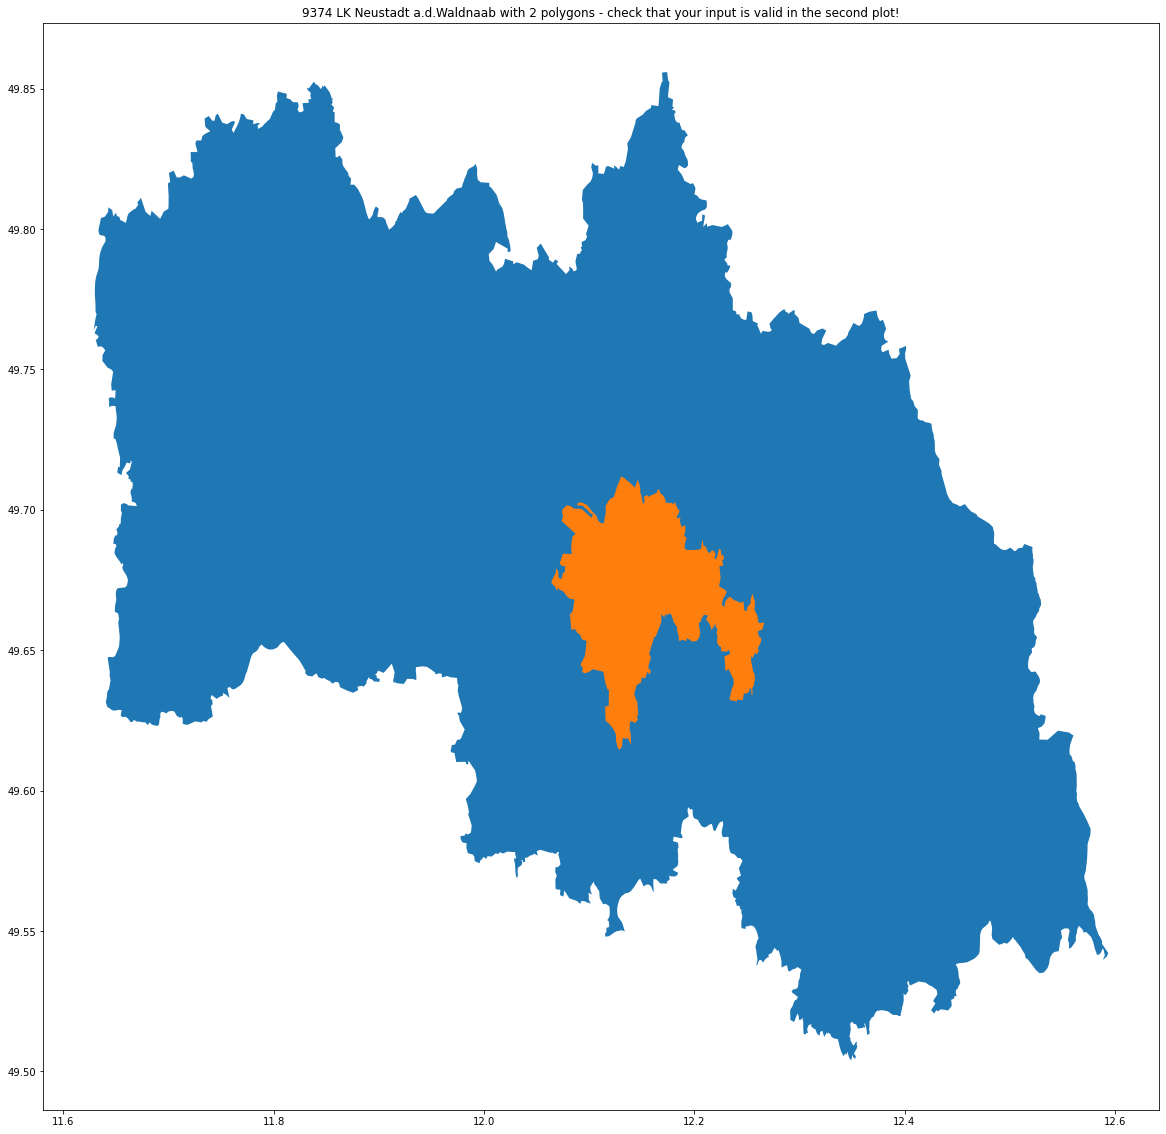

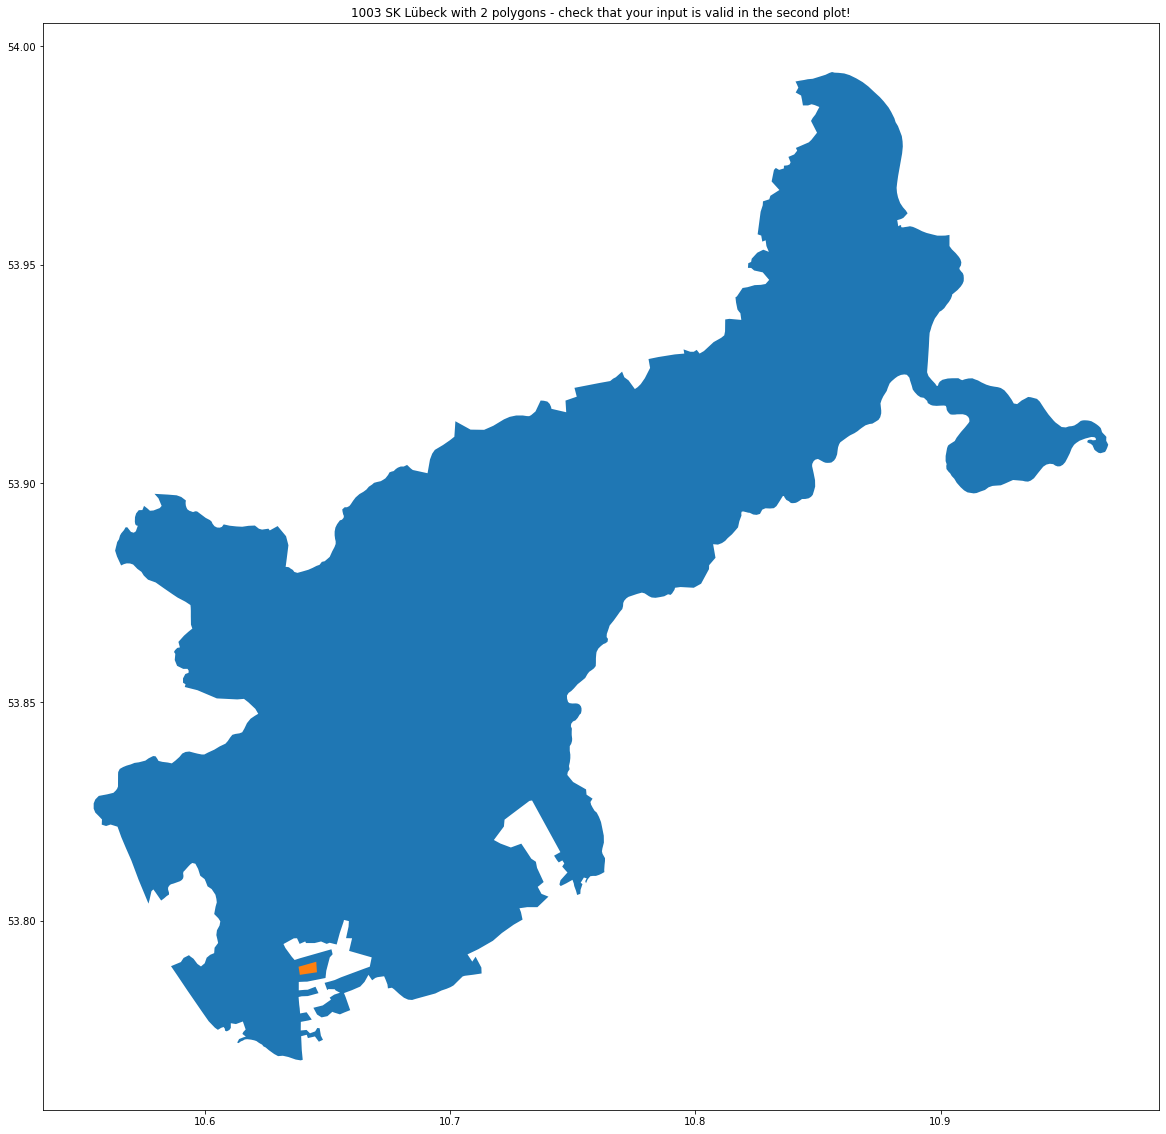

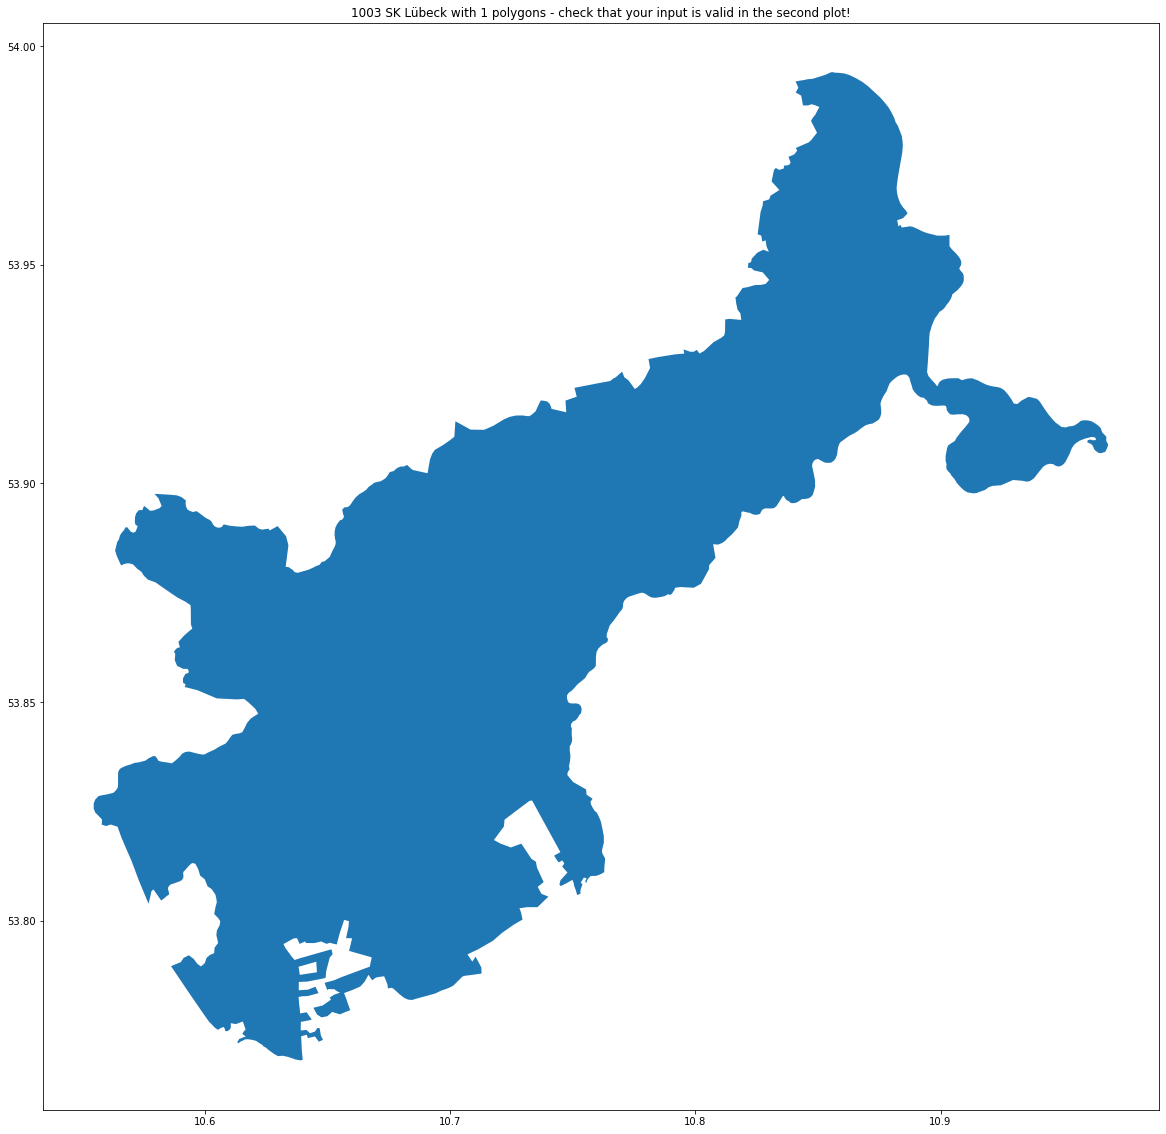

In [2]:
os.chdir("..")   # move one directory up
%run color_scheme.ipynb
%run collect_data/get_data.ipynb
os.chdir(pop_densities_directory)    # return to original directory

### Plot the Population Density
Generates a plot of the population densities of the counties and the districts. The plots contain a plot showing the distribution and a map of Germany showing the spacial distribution. The two images are saved in the result folder two directories above this file.
#### Population density in the counties
At the end the population densities are plotted on the left side two dimensional as a sorted list to see how many districts have which population density and on the right side as a map of Germany to show their spacial distribution.

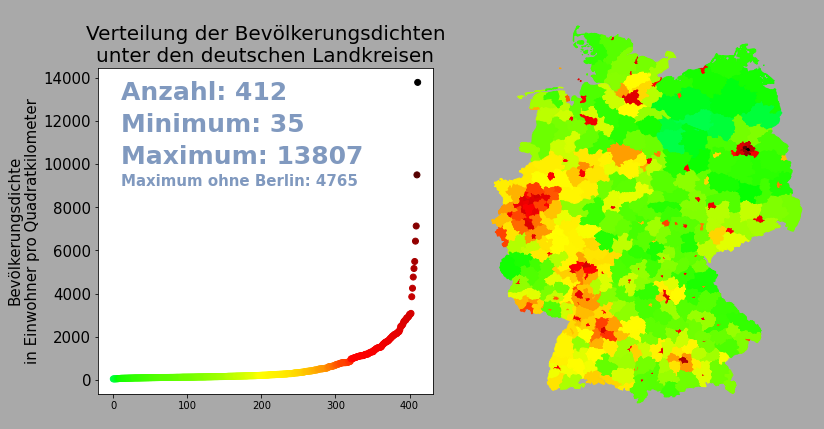

In [3]:
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot
population_densities = list()
for AdmUnitId, county in counties_geography.items():
    population_densities.append(county["population_density"])
population_densities.sort()

plt.title("Verteilung der Bevölkerungsdichten\nunter den deutschen Landkreisen",
         fontsize=20)
plt.ylabel("Bevölkerungsdichte\nin Einwohner pro Quadratkilometer",
         fontsize=15)
plt.yticks(fontsize=15)
plt.text(10, 13000, "Anzahl: " + str(len(population_densities)),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))
plt.text(10, 11500, "Minimum: " + str(int(population_densities[0])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))
plt.text(10, 10000, "Maximum: " + str(int(population_densities[-1])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))
plt.text(10, 9000, "Maximum ohne Berlin: " + str(int(population_densities[-7])),
         fontweight=1000, fontsize=15, color=(0.5, 0.6, 0.75))

colors = list()
for pop_density in population_densities:
    colors.append(color_scheme(pop_density, population_densities))
plt.scatter([i for i in range(len(population_densities))],
            population_densities, color=colors)

ax = plt.axes([1, 0.06, 0.79, 0.96], frameon=False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
for county in counties_geography.values():
    for polygon in county['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color_scheme(county["population_density"],
                                          population_densities))

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.savefig("results/population_density_counties.png",
            facecolor="darkgrey", bbox_inches=Bbox([[-0.7,0.45],[10.7,6]]))
os.chdir(pop_densities_directory)    # return to original directory

#### Population density in the districts
At the end the population densities are plotted on the left side two dimensional as a sorted list to see how many districts have which population density and on the right side as a map of Germany to show their spacial distribution.

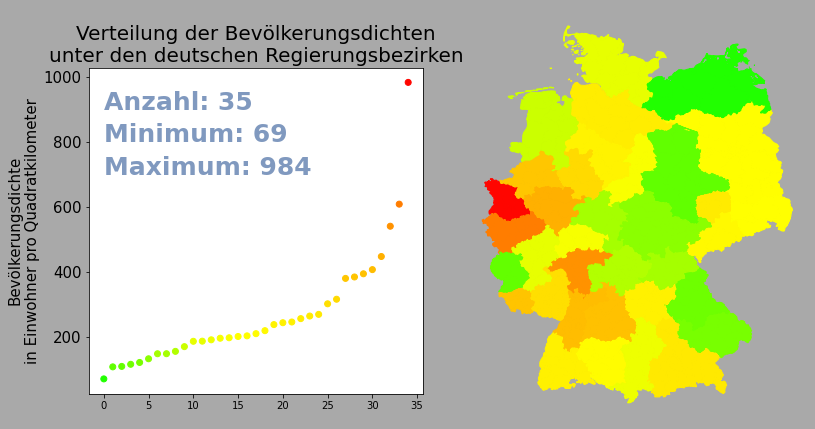

In [5]:
pop_densities_districts = non_county_specific_data["pop_densities_districts"]
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot
population_densities_districts = list(pop_densities_districts.values())
population_densities_districts.sort()

plt.title("Verteilung der Bevölkerungsdichten\nunter den deutschen Regierungsbezirken",
         fontsize=20)
plt.ylabel("Bevölkerungsdichte\nin Einwohner pro Quadratkilometer",
         fontsize=15)
plt.yticks(fontsize=15)
plt.text(0, 900, "Anzahl: " + str(len(population_densities_districts)),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))
plt.text(0, 800, "Minimum: " + str(int(population_densities_districts[0])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))
plt.text(0, 700, "Maximum: " + str(int(population_densities_districts[-1])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))

colors = list()
for pop_density in population_densities_districts:
    colors.append(color_scheme(pop_density, population_densities))
plt.scatter([i for i in range(len(population_densities_districts))],
            population_densities_districts, color=colors)


ax = plt.axes([1, 0.06, 0.79, 0.96], frameon=False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
for district, counties_in_district in districts.items():
    for AdmUnitId in counties_in_district:
        for polygon in counties_geography[AdmUnitId]['geometry']:
            x,y = np.array(polygon).T
            plt.fill(x, y, color=color_scheme(pop_densities_districts[district],
                                              population_densities))
    # remove '#' to count the districts
    # plt.plot(x, y, color="black")

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.savefig("results/population_density_ditricts.png",
            facecolor="darkgrey", bbox_inches=Bbox([[-0.7,0.45],[10.7,6]]))
os.chdir(pop_densities_directory)    # return to original directory